In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from pval_qqplot import *

In [15]:
cancer_type = 'PRAD'
tissue_type = 'Tumor'

In [16]:
df = pd.read_csv('~/DATA0/Hyoeun/spliceQTL/Tools/FastQTL/SI_QTL/{0}/{1}/add_cov_nomi_result'.format('Normal', cancer_type), 
                 sep=' ', header=None, index_col=1, names=['QTL', 'rs_id', 'drop', 'pval', 'effect_size'])
df = df.drop('drop', axis=1)

In [17]:
shared_path = '~/DATA1/Hyoeun/spliceQTL/QTLset'
gwas = pd.read_csv('~/DATA1/Hyoeun/spliceQTL/Analysis/00_GWAS.Input/{0}_GWAS.hg38.BASE.OR.uniq.assoc'.format(cancer_type),
                   sep='\t', header=0, index_col=0)
#eqtl = pd.read_csv('{0}/eQTL/shared/v2_unique.{1}.{2}_merged.txt'.format(shared_path, cancer_type, tissue_type),
#                   sep=' ', header=None, index_col=1).index
#sqtl = pd.read_csv('{0}/shared/v2_unique.{1}.{2}_merged.txt'.format(shared_path, cancer_type, tissue_type),
#                   sep=' ', header=None, index_col=1).index
#tuqtl = pd.read_csv('{0}/tuQTL/shared/v2_unique.{1}.{2}_merged.txt'.format(shared_path, cancer_type, tissue_type),
#                    sep=' ', header=None, index_col=1).index

In [18]:
gwas = gwas[gwas['P'] < 5 * 10**(-8)].index

In [19]:
tuqtl.shape

NameError: name 'tuqtl' is not defined

In [20]:
binsize = 100
sorted_df = df.sort_values(by=['pval']).reset_index()
bins = pd.cut(sorted_df.index, bins=int(sorted_df.shape[0] / binsize))
binned_pval = sorted_df.groupby(bins).mean()['pval']

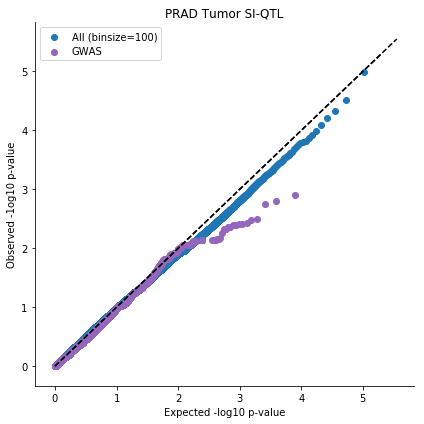

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
pval_qqplot(binned_pval, ax=ax, label='All (binsize=100)')
#pval_qqplot(df.loc[np.intersect1d(df.index, eqtl), 'pval'], ax=ax, label='eQTL')
#pval_qqplot(df.loc[np.intersect1d(df.index, sqtl), 'pval'], ax=ax, label='sQTL')
#pval_qqplot(df.loc[np.intersect1d(df.index, tuqtl), 'pval'], ax=ax, label='tuQTL')
pval_qqplot(df.loc[np.intersect1d(df.index, gwas), 'pval'], ax=ax, label='GWAS', color='C4')
ax.legend()
ax.set_title('{0} {1} SI-QTL'.format(cancer_type, tissue_type))
sns.despine()
fig.tight_layout()
plt.show()

In [22]:
fig.savefig('../data/Analysis/SI-QTL/20181001/{0}_{1}.SI_QTL.qqplot.png'.format(cancer_type, tissue_type))
fig.savefig('../data/Analysis/SI-QTL/20181001/{0}_{1}.SI_QTL.qqplot.pdf'.format(cancer_type, tissue_type))

In [64]:
sns.distplot(df.loc[np.intersect1d(df.index, eqtl), 'pval'])
sns.distplot(df.loc[np.intersect1d(df.index, sqtl), 'pval'])
sns.distplot(df.loc[np.intersect1d(df.index, tuqtl), 'pval'])

KeyboardInterrupt: 